# Read and Visualise Sentinel-2 data using RasterIO

## South Coast, United Kingdom

---
DTR

# Import Packages

In [1]:
import numpy as np

In [2]:
#import earthpy as et
#import earthpy.spatial as es
#import earthpy.plot as ep

In [3]:
import earthpy.plot as ep

In [4]:
import rasterio as rio

In [5]:
rio.__version__

'1.3.7'

In [6]:
import cartopy

In [7]:
import matplotlib.pyplot as plt

In [8]:
from matplotlib.colors import ListedColormap

In [9]:
import time

In [10]:
import os

# Directory Management

In [11]:
os.getcwd()

'/media/donald/disk4nvme/GEOSPATIAL_DATA_READ_PROCESS'

## Data Directory

In [12]:
# directory
dir_data = '/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/Sentinel_2/'
# sentinel 2 IMG directory
SENT2_IMG_DIR = 'S2B_MSIL2A_20230526T110629_N0509_R137_T30UWB_20230526T124002.SAFE/'

In [13]:
#path
dir_data = os.path.join(dir_data, SENT2_IMG_DIR)
dir_data

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/Sentinel_2/S2B_MSIL2A_20230526T110629_N0509_R137_T30UWB_20230526T124002.SAFE/'

In [14]:
# list the files in the data directory
os.listdir(dir_data)

['manifest.safe',
 'AUX_DATA',
 'rep_info',
 'HTML',
 'INSPIRE.xml',
 'GRANULE',
 'MTD_MSIL2A.xml',
 'DATASTRIP']

## Change Directory

In [15]:
os.chdir(dir_data)

In [16]:
os.getcwd()

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/Sentinel_2/S2B_MSIL2A_20230526T110629_N0509_R137_T30UWB_20230526T124002.SAFE'

# List Sentinel-2 images on IMG_DATA

In [17]:
fpaths_Sentinel_2_fullpath = []

fpaths_Sentinel_2_filenamesonly = []


# r=root, d=directories, f = files
for r, d, f in os.walk("./GRANULE/L2A_T30UWB_A032481_20230526T110840/IMG_DATA/"):
    for file in f:
        if file.endswith(".jp2"):
            #print(os.path.join(r, file))
            fpaths_Sentinel_2_fullpath.append(os.path.join(r, file))
            ## file only no path
            fpaths_Sentinel_2_filenamesonly.append(file)
            
            
print('... completed processing')

... completed processing


In [18]:
fpaths_Sentinel_2_fullpath

['./GRANULE/L2A_T30UWB_A032481_20230526T110840/IMG_DATA/R20m/T30UWB_20230526T110629_B04_20m.jp2',
 './GRANULE/L2A_T30UWB_A032481_20230526T110840/IMG_DATA/R20m/T30UWB_20230526T110629_AOT_20m.jp2',
 './GRANULE/L2A_T30UWB_A032481_20230526T110840/IMG_DATA/R20m/T30UWB_20230526T110629_SCL_20m.jp2',
 './GRANULE/L2A_T30UWB_A032481_20230526T110840/IMG_DATA/R20m/T30UWB_20230526T110629_B01_20m.jp2',
 './GRANULE/L2A_T30UWB_A032481_20230526T110840/IMG_DATA/R20m/T30UWB_20230526T110629_B06_20m.jp2',
 './GRANULE/L2A_T30UWB_A032481_20230526T110840/IMG_DATA/R20m/T30UWB_20230526T110629_B02_20m.jp2',
 './GRANULE/L2A_T30UWB_A032481_20230526T110840/IMG_DATA/R20m/T30UWB_20230526T110629_B03_20m.jp2',
 './GRANULE/L2A_T30UWB_A032481_20230526T110840/IMG_DATA/R20m/T30UWB_20230526T110629_WVP_20m.jp2',
 './GRANULE/L2A_T30UWB_A032481_20230526T110840/IMG_DATA/R20m/T30UWB_20230526T110629_B05_20m.jp2',
 './GRANULE/L2A_T30UWB_A032481_20230526T110840/IMG_DATA/R20m/T30UWB_20230526T110629_TCI_20m.jp2',
 './GRANULE/L2A_T30U

# Read the data

read band-by-band. However, we can also iterate over the list

read S2 Band 2

In [19]:
Band_want = "B02_60m"

fle_nem = [s for s in fpaths_Sentinel_2_fullpath if Band_want in s]
fle_nem

['./GRANULE/L2A_T30UWB_A032481_20230526T110840/IMG_DATA/R60m/T30UWB_20230526T110629_B02_60m.jp2']

In [20]:
# Read band
S2_B02 = rio.open(fle_nem[0])

In [21]:
S2_B02

<open DatasetReader name='./GRANULE/L2A_T30UWB_A032481_20230526T110840/IMG_DATA/R60m/T30UWB_20230526T110629_B02_60m.jp2' mode='r'>

In [22]:
# what of the first question, what the coordinate reference system
S2_B02.crs

CRS.from_epsg(32630)

EPSG:32630

WGS 84 / UTM zone 30N

In [23]:
# bounding box of the image in the CRS
S2_B02.bounds

BoundingBox(left=499980.0, bottom=5590200.0, right=609780.0, top=5700000.0)

In [24]:
# the transform
S2_B02.transform

Affine(60.0, 0.0, 499980.0,
       0.0, -60.0, 5700000.0)

In [25]:
# meta data as a python dict
S2_B02.meta

{'driver': 'JP2OpenJPEG',
 'dtype': 'uint16',
 'nodata': None,
 'width': 1830,
 'height': 1830,
 'count': 1,
 'crs': CRS.from_epsg(32630),
 'transform': Affine(60.0, 0.0, 499980.0,
        0.0, -60.0, 5700000.0)}

define extents for plt plotting later

    - extent=[horizontal_min,horizontal_max,vertical_min,vertical_max].
    
    - Using Lat-Long extent=[longitude_left, longitude_right,latitude_bottom, latitude_top]

In [26]:
S2_B02.bounds.left, S2_B02.bounds.top

(499980.0, 5700000.0)

In [27]:
img_bounds = [S2_B02.bounds.left, S2_B02.bounds.right, S2_B02.bounds.bottom, S2_B02.bounds.top]
img_bounds

[499980.0, 609780.0, 5590200.0, 5700000.0]

read Band 3

In [28]:
Band_want = "B03_60m"


fle_nem = [s for s in fpaths_Sentinel_2_fullpath if Band_want in s]
print(fle_nem)

S2_B03 = rio.open(fle_nem[0])

['./GRANULE/L2A_T30UWB_A032481_20230526T110840/IMG_DATA/R60m/T30UWB_20230526T110629_B03_60m.jp2']


In [29]:
S2_B03

<open DatasetReader name='./GRANULE/L2A_T30UWB_A032481_20230526T110840/IMG_DATA/R60m/T30UWB_20230526T110629_B03_60m.jp2' mode='r'>

In [30]:
S2_B03.crs

CRS.from_epsg(32630)

read Band 4

In [31]:
Band_want = "B04_60m"


fle_nem = [s for s in fpaths_Sentinel_2_fullpath if Band_want in s]
print(fle_nem)

S2_B04 = rio.open(fle_nem[0])

['./GRANULE/L2A_T30UWB_A032481_20230526T110840/IMG_DATA/R60m/T30UWB_20230526T110629_B04_60m.jp2']


In [32]:
S2_B04

<open DatasetReader name='./GRANULE/L2A_T30UWB_A032481_20230526T110840/IMG_DATA/R60m/T30UWB_20230526T110629_B04_60m.jp2' mode='r'>

read Band 8

In [33]:
Band_want = "B8A_60m"


fle_nem = [s for s in fpaths_Sentinel_2_fullpath if Band_want in s]
print(fle_nem)

S2_B08 = rio.open(fle_nem[0])

['./GRANULE/L2A_T30UWB_A032481_20230526T110840/IMG_DATA/R60m/T30UWB_20230526T110629_B8A_60m.jp2']


In [34]:
S2_B08

<open DatasetReader name='./GRANULE/L2A_T30UWB_A032481_20230526T110840/IMG_DATA/R60m/T30UWB_20230526T110629_B8A_60m.jp2' mode='r'>

# Get the data arrays

use read()

In [35]:
arr_S2_B02 = S2_B02.read(1)

In [36]:
arr_S2_B02

array([[1738, 1734, 1737, ..., 1263, 1267, 1315],
       [1734, 1736, 1732, ..., 1298, 1276, 1284],
       [1735, 1734, 1743, ..., 1351, 1333, 1275],
       ...,
       [1383, 1382, 1381, ..., 1375, 1370, 1375],
       [1389, 1391, 1385, ..., 1384, 1375, 1379],
       [1391, 1387, 1389, ..., 1377, 1372, 1370]], dtype=uint16)

In [37]:
arr_S2_B02.shape

(1830, 1830)

In [38]:
# Band 3 array
arr_S2_B03 = S2_B03.read(1)

In [39]:
# Band 3 array
arr_S2_B04 = S2_B04.read(1)

In [40]:
# Band 8 array
arr_S2_B08 = S2_B08.read(1)

# Quick plot individual bands

use plt

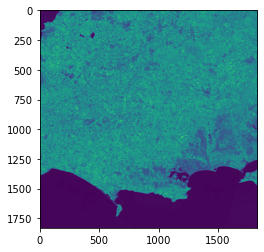

In [41]:
plt.figure()
plt.imshow(arr_S2_B08)
plt.show()

use Earthpy

<Figure size 432x288 with 0 Axes>

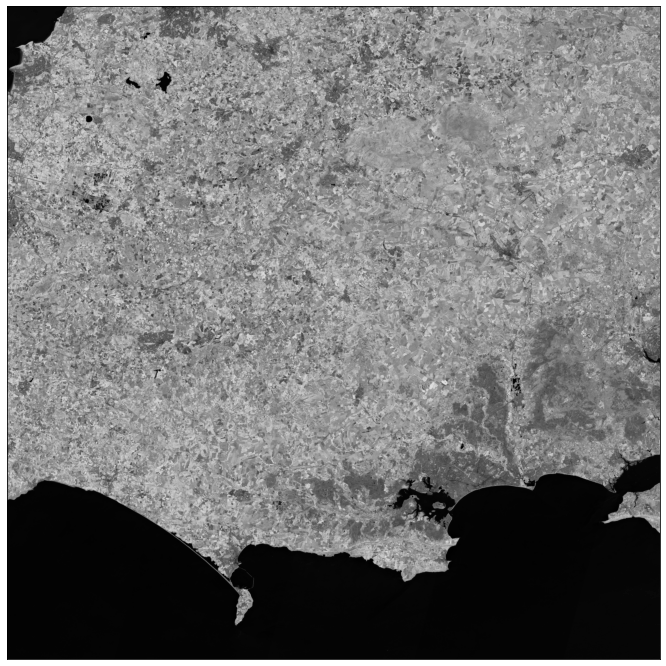

In [42]:
plt.figure()
ep.plot_bands(arr_S2_B08, cbar=False, scale=True, extent=img_bounds)
plt.show()

# Visualize Color Composites 

Multi-spectral images are best visualized using color composites. In order to 'create' a color composite you need to stack the data (- the bands). You need to stack 3 bands, because to see color you need 'three colors' - R-G-B

## Natural Color Composite

For Sentinel 2, a natural color composite is defined using S2 bands: 

 - <font color='red'> Red:  </font> B4 
 - <font color='green'> Green: </font> B3
 - <font color='blue'> Blue:  </font>  B2

the most basic way

In [43]:
ds_S2_list = [] # list to store the bands

ds_S2_list.append(arr_S2_B02) # band 2

ds_S2_list.append(arr_S2_B03) # band 3

ds_S2_list.append(arr_S2_B04) # band 4

# note the order

ds_S2_stacked = np.stack(ds_S2_list)

In [44]:
ds_S2_stacked.shape

(3, 1830, 1830)

## Plot using EarthPy

<Figure size 1008x720 with 0 Axes>

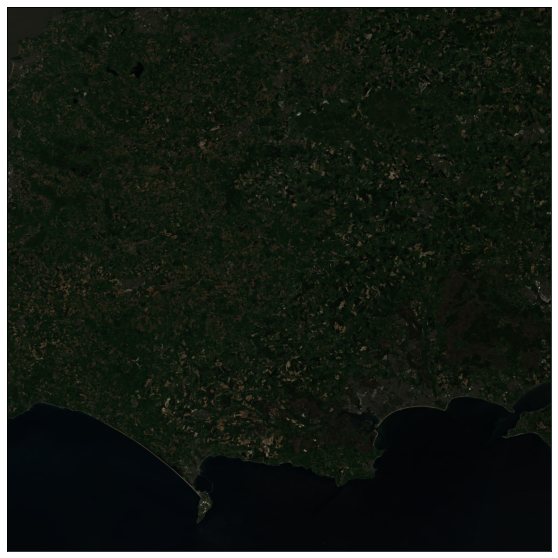

In [45]:
plt.figure(figsize=(14, 10))
ep.plot_rgb( ds_S2_stacked, rgb=(2,1,0), extent=img_bounds )
plt.show()

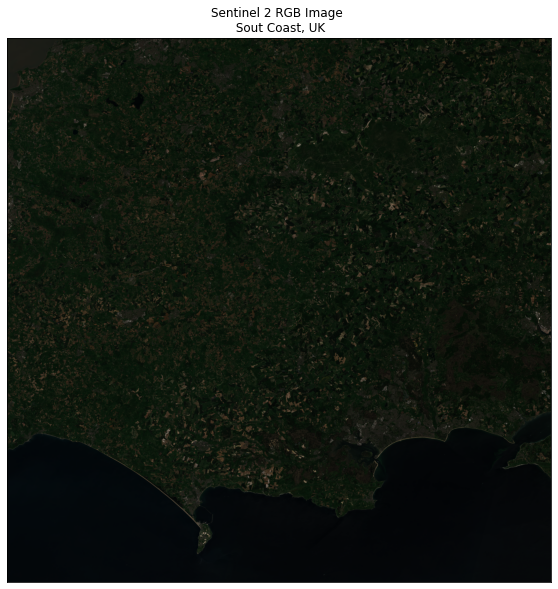

In [46]:
# Create figure with one plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot red, green, and blue bands, respectively
ep.plot_rgb(ds_S2_stacked, rgb=(2,1,0), ax=ax, title="Sentinel 2 RGB Image \n Sout Coast, UK")
plt.show()

## Stretch the image

Composite images can sometimes be dark depending on the skewness of the pixel values. You can use EarthPy to stretch the values

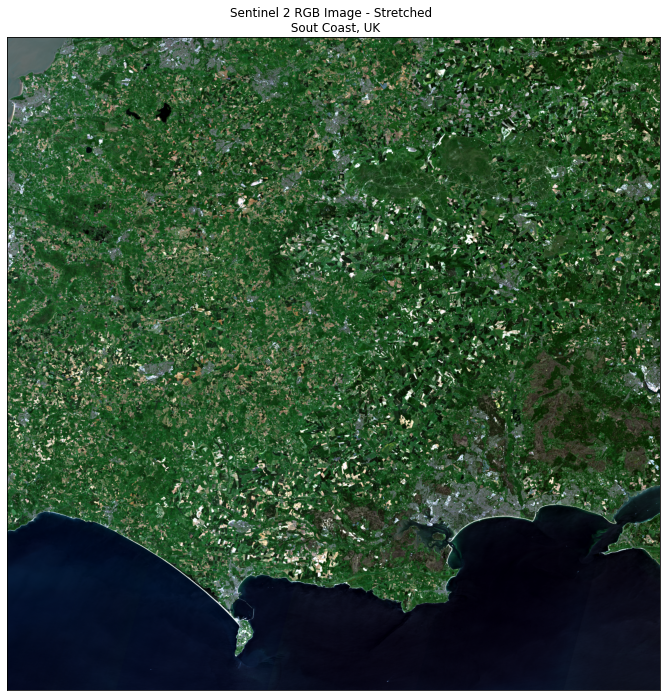

In [47]:
# Create figure with one plot
fig, ax1 = plt.subplots(figsize=(12, 12))

# Plot bands with stretched applied
ep.plot_rgb(ds_S2_stacked, rgb=(2,1,0), ax=ax1, stretch=True, str_clip=0.5, 
            title="Sentinel 2 RGB Image - Stretched \n Sout Coast, UK",
           )
plt.show()

# Doing it manually

##  Min-Max Normalize

the function

In [48]:
# Function to normalize the raster values

def minmax_normalize(array):
    """
    Normalizes raster arrays to between 0.0 and 1.0
    """
    arr_min_val, arr_max_val = array.min(), array.max() # Get the minimum and maximum value
    
    return ((array - arr_min_val)/(arr_max_val - arr_min_val))

normalize

In [49]:
arr_norm_S2_B2 = minmax_normalize(arr_S2_B02)  # resulting values should be between 0 and 1

arr_norm_S2_B3 = minmax_normalize(arr_S2_B03)  # resulting values should be between 0 and 1

arr_norm_S2_B4 = minmax_normalize(arr_S2_B04)  # resulting values should be between 0 and 1

check

In [50]:
arr_norm_S2_B4.min(), arr_norm_S2_B4.max()

(0.0, 1.0)

## stack the data

In [51]:
ds_mnx_stack = np.stack((arr_norm_S2_B4, arr_norm_S2_B3, arr_norm_S2_B2), axis=2) # order: R - G- B

In [52]:
ds_mnx_stack.shape

(1830, 1830, 3)

## Plot using Matplotlib

We can now plot

NB: Matplotlib expects the data for imshow to be either in the range [0,1] if it's float or [0,255] if it's an integer.

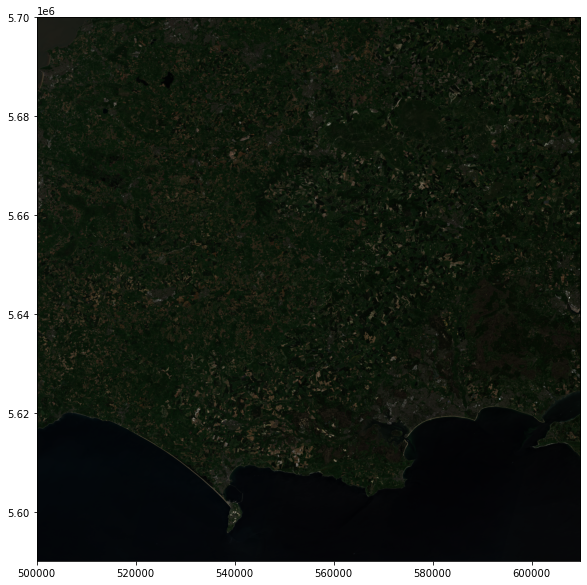

In [53]:
plt.figure(figsize=(14, 10))
plt.imshow(ds_mnx_stack, extent=img_bounds )

plt.show()

## Improve brightness

In [54]:
ds_br_stack = np.stack((arr_norm_S2_B4, arr_norm_S2_B3, arr_norm_S2_B2), axis=2) # order: R - G- B
ds_br_stack = ds_br_stack/np.quantile(ds_br_stack, 0.99)

In [55]:
ds_br_stack.shape

(1830, 1830, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


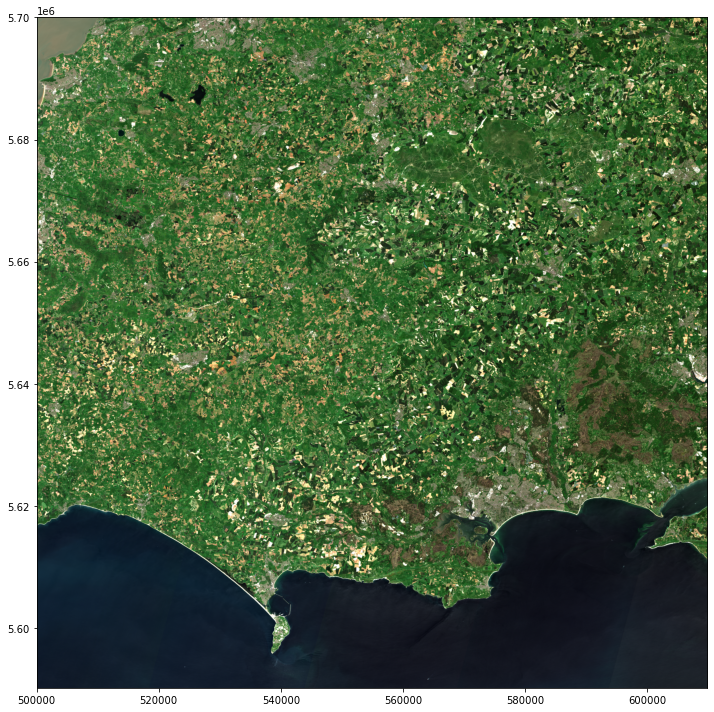

In [56]:
plt.figure(figsize=(14,10))
plt.imshow(ds_br_stack, extent=img_bounds)
plt.tight_layout()
plt.show()